In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from plotManager import plotManager
DATASET_PATH = "./data/2_bike_rental_dataset_preprocessed.csv"

## Create train and test datasets

In [3]:
df = pd.read_csv(DATASET_PATH, index_col="instant")
df.head()
columns = df.columns
columns = columns.drop("rentals")
columns = columns.drop("date")

print(columns)
X = df[columns]
y = df["rentals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=20, shuffle=False)

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')


In [4]:
regressor_random_forest = RandomForestRegressor(n_estimators=50, random_state=0)
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [5]:
y_pred = regressor_random_forest.predict(X_test)
y_pred

array([ 86.32,  42.78,  14.86, ..., 109.2 ,  94.84,  48.82])

In [6]:
print("Final Model")
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root mean square error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error: " + str(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print("Max error: " + str(metrics.max_error(y_test, y_pred)))

Final Model
Mean absolute error: 50.451984255083474
Mean squared error: 5469.010397869742
Root mean square error: 73.95275787872784
Mean absolute percentage error: 0.4463479378231977
Max error: 439.32


# Searching for optimal hyperparameters

In [7]:
n_estimators = [x for x in range(10,300,30)]
max_depth = [x for x in range(10,200,30)]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 40, 70, 100, 130, 160, 190, 220, 250, 280], 'max_depth': [10, 40, 70, 100, 130, 160, 190], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [8]:
rf_base = RandomForestRegressor()
random_forest_random = RandomizedSearchCV(estimator = rf_base, param_distributions=random_grid, n_iter=10)
random_forest_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 40, 70, 100, 130, 160,
                                                      190],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 40, 70, 100, 130,
                                                         160, 190, 220, 250,
                                                         280]})

In [10]:
random_forest_random.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 100,
 'bootstrap': True}

# Random Forest Model using Best Parameters

In [11]:
random_forest_opt = RandomForestRegressor(n_estimators=70, min_samples_split=5, min_samples_leaf=1, max_depth=100 ,random_state = 10, bootstrap=True)
random_forest_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_split=5, n_estimators=70,
                      random_state=10)

In [12]:
y_pred = random_forest_opt.predict(X_test)
y_pred

array([ 71.42639456,  45.60068027,  13.62624717, ..., 100.53093537,
        93.14026644,  51.52272109])

## Performance Evaluation

In [13]:
print("Final Model")
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root mean square error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error: " + str(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print("Max error: " + str(metrics.max_error(y_test, y_pred)))

Final Model
Mean absolute error: 50.03345054961616
Mean squared error: 5348.049375123914
Root mean square error: 73.13035877885403
Mean absolute percentage error: 0.4671533603096181
Max error: 433.6834065141208


## Prediction Result

In [14]:
new_df=y_test.copy()
new_df = new_df.to_frame()
new_df['predicted_rentals'] = y_pred
new_df = new_df.sort_index()
new_df

,rentals,predicted_rentals
instant,,
12839,60,71.426395
12840,13,45.600680
12841,8,13.626247
12842,25,74.804046
12843,71,101.394059
...,...,...
17375,119,191.284450
17376,89,145.641628
17377,90,100.530935


AttributeError: 'Int64Index' object has no attribute 'strftime'

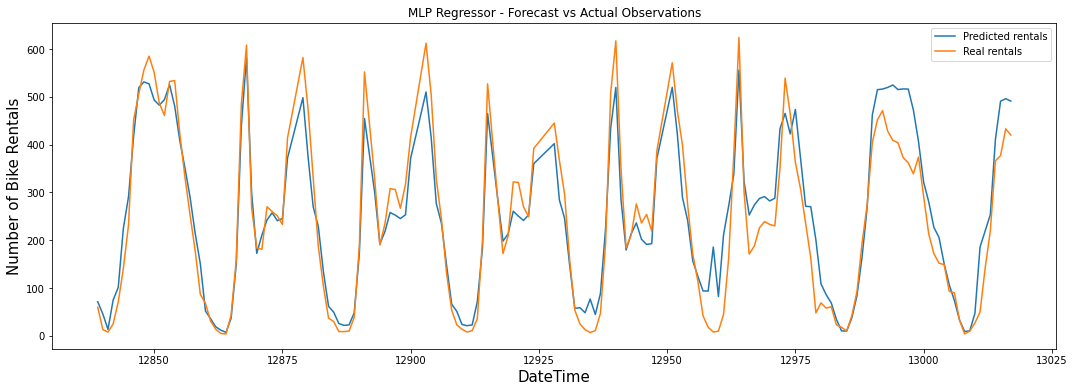

In [15]:
plotMan = plotManager(new_df)
plotMan.forecast_plot(new_df)